In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
df=pd.read_csv("Postures.csv")

In [ ]:
df.shape

(78096, 38)

In [ ]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [ ]:
df.isna().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
X11      0
Y11      0
Z11      0
dtype: int64

In [ ]:
df.replace('?','0',inplace = True)
df = df.astype(float)
df=df.iloc[1:]
df.drop("User",axis=1,inplace=True)

In [ ]:
df.describe()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,...,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906,...,-9.535343,16.802219,24.719138,-8.524955,10.154914,13.979146,-5.617450,-0.011789,0.010306,0.000674
std,1.421152,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384,...,25.321953,33.583912,44.032514,23.820691,26.873653,34.451890,20.805720,1.149642,0.888304,0.393026
min,1.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296,...,-142.654497,-99.231688,-64.734284,-113.397327,-80.196289,-65.019295,-112.668930,-96.951690,-65.432143,-48.274677
25%,2.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339,...,-7.750354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134,...,0.000000,12.497466,37.681938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879,...,119.213101,174.054403,167.942588,123.380512,149.486224,168.352478,108.455548,84.683328,127.945490,18.062286


In [ ]:
X = df.drop("Class", axis = 1)
y = df['Class']

In [ ]:
df.head()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99      4071
         2.0       0.98      0.97      0.97      3703
         3.0       0.99      0.99      0.99      4178
         4.0       0.99      0.99      0.99      3648
         5.0       0.98      0.98      0.98      3924

    accuracy                           0.99     19524
   macro avg       0.99      0.99      0.99     19524
weighted avg       0.99      0.99      0.99     19524

[[4047   16    8    0    0]
 [   2 3576   21   22   82]
 [  13    0 4143   21    1]
 [   2    1   28 3610    7]
 [   0   42    6   11 3865]]


<Axes: >

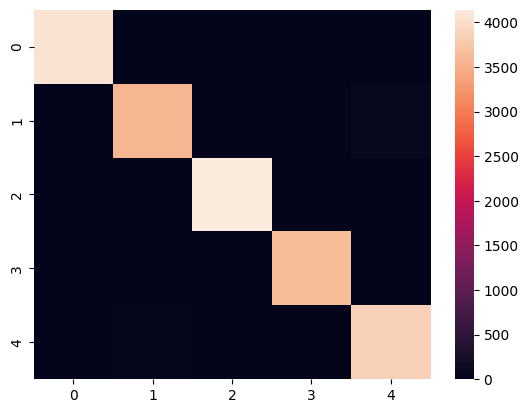

In [ ]:
rtree = RandomForestClassifier(100)
rtree.fit(scaled_X_train, y_train)
y_pred_RFC = rtree.predict(scaled_X_test)
print(classification_report(y_test,y_pred_RFC))
print(confusion_matrix(y_test,y_pred_RFC))
sns.heatmap(confusion_matrix(y_test,y_pred_RFC))

              precision    recall  f1-score   support

         1.0       0.85      0.91      0.88      3269
         2.0       0.86      0.88      0.87      2971
         3.0       0.80      0.78      0.79      3341
         4.0       0.76      0.79      0.77      2910
         5.0       0.84      0.76      0.80      3128

    accuracy                           0.82     15619
   macro avg       0.82      0.82      0.82     15619
weighted avg       0.82      0.82      0.82     15619

[[2962   11  290    5    1]
 [  21 2610   24   33  283]
 [ 330   16 2591  373   31]
 [ 138   55  271 2292  154]
 [  38  340   63  308 2379]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

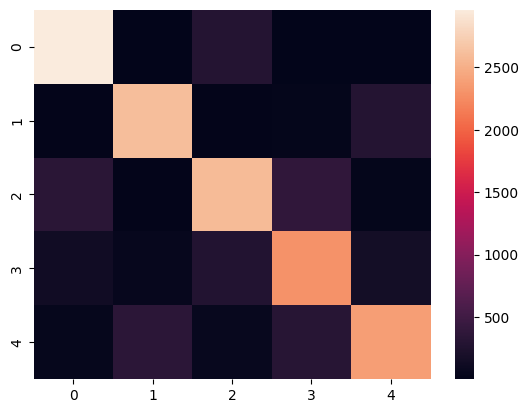

In [ ]:
log_model = LogisticRegression(max_iter=750)
log_model.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))
sns.heatmap(confusion_matrix(y_test,y_pred_log))

              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98      4071
         2.0       0.92      0.96      0.94      3703
         3.0       0.96      0.94      0.95      4178
         4.0       0.91      0.94      0.92      3648
         5.0       0.98      0.89      0.93      3924

    accuracy                           0.95     19524
   macro avg       0.95      0.95      0.94     19524
weighted avg       0.95      0.95      0.95     19524

[[4054   16    1    0    0]
 [  19 3555   18   41   70]
 [  81    2 3909  183    3]
 [  34   20  139 3445   10]
 [  15  262   23  132 3492]]


<Axes: >

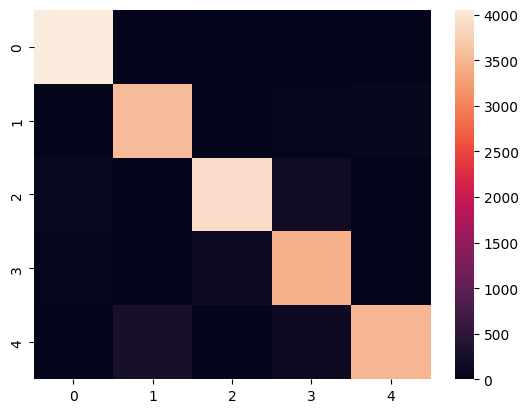

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(scaled_X_train,y_train)
y_pred_knn = knn_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
sns.heatmap(confusion_matrix(y_test,y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      4071
         2.0       0.98      0.97      0.98      3703
         3.0       0.98      0.98      0.98      4178
         4.0       0.98      0.98      0.98      3648
         5.0       0.98      0.98      0.98      3924

    accuracy                           0.98     19524
   macro avg       0.98      0.98      0.98     19524
weighted avg       0.98      0.98      0.98     19524

[[4049   16    6    0    0]
 [  11 3605   20   20   47]
 [  34    0 4109   25   10]
 [   5    0   45 3584   14]
 [   0   60   13   13 3838]]


<Axes: >

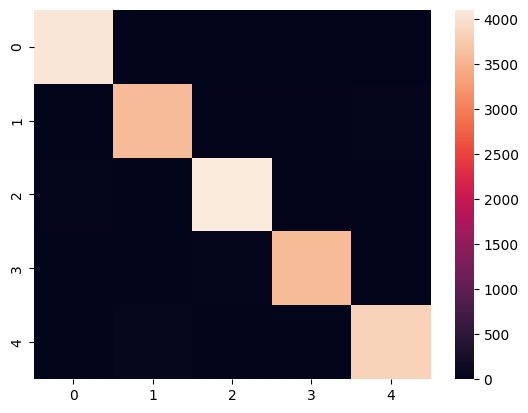

In [ ]:
svm_model = SVC()
svm_model.fit(scaled_X_train,y_train)
y_pred_svm = svm_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
sns.heatmap(confusion_matrix(y_test,y_pred_svm))

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      4071
         2.0       0.95      0.95      0.95      3703
         3.0       0.97      0.97      0.97      4178
         4.0       0.96      0.95      0.96      3648
         5.0       0.94      0.95      0.95      3924

    accuracy                           0.96     19524
   macro avg       0.96      0.96      0.96     19524
weighted avg       0.96      0.96      0.96     19524

[[4025   17   16    2   11]
 [  16 3515   15   25  132]
 [  22   15 4048   65   28]
 [   8   21   75 3478   66]
 [   4  122   25   42 3731]]


<Axes: >

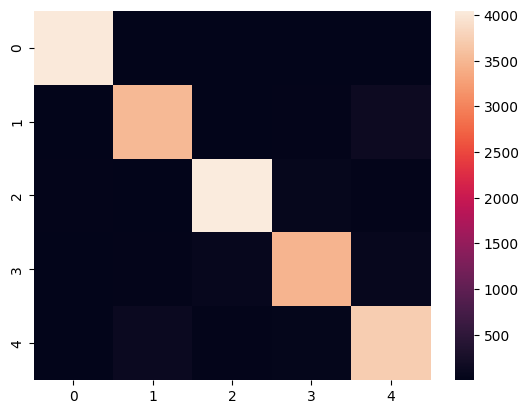

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(scaled_X_train,y_train)
y_pred_tree = tree_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree))
sns.heatmap(confusion_matrix(y_test,y_pred_tree))